# Limpieza del DataSet

In [1]:
# Importamos las librerias basicas de python
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Guardamos el path del archivo en una variable para despues cargarlo en un df

file = 'C:/Users/Ramiro/Desktop/Digital House/Desafios/Proyecto Integrador/Churn Naranja Muestra.csv'

# Creamos un DataFrame con la info del csv
df = pd.read_csv(file, sep='\t', encoding='ANSI')

In [3]:
#Veamos algunos datos del dataset

df.head()

,Solicitud_Contrato,npoliza,ncertificado,ncproducto,Producto,Ramo,Estado,Premio,Producto_Masivo,Lapse_90,cdocumento,cdSexo,Edad,cdProvincia,Medio_Venta_H,Punto_Venta_H,Puesto_Venta_H,Rentabilidad,Segmento
0,232-405557-2407376,405557,2407376,232,Acc Pers Tarjetas con Cl Ajus,Accidentes Personales,Vigente,30.81,1,0,30900513,Masculino,34,Cordoba,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q3,Tx Con Financ.
1,301-100618-390797,100618,390797,301,SVC Tarjetas con Cl Ajuste,Vida Colectivo,Vigente,36.03,1,0,33920078,Femenino,30,Rio Negro,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q1,Completos
2,304-100723-73514,100723,73514,304,SVC T.Naranja Todos Venden,Vida Colectivo,Vigente,62.00,0,0,26459882,Femenino,40,Santiago del Estero,Sucursales (MV),FV Socio (PunV),Todos Venden (PueV),Q3,Completos
3,232-405557-2355690,405557,2355690,232,Acc Pers Tarjetas con Cl Ajus,Accidentes Personales,Vigente,37.19,1,0,17794433,Femenino,52,Santa Fe,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q2,Completos
4,232-405557-1165633,405557,1165633,232,Acc Pers Tarjetas con Cl Ajus,Accidentes Personales,Vigente,36.04,1,0,30851203,Masculino,34,Santa Fe,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q4,Mixto Con Financ.Z


Podemos observar que el dataset contiene datos relacionados a la poliza en si, y datos referentes al cliente titular de cada poliza.
Asimismo, notamos que cada poliza es una observacion dentro del dataframe.

In [4]:
#Veamos un poco como esta compuesto el dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 19 columns):
Solicitud_Contrato    300000 non-null object
npoliza               300000 non-null int64
ncertificado          300000 non-null int64
ncproducto            300000 non-null int64
Producto              300000 non-null object
Ramo                  300000 non-null object
Estado                300000 non-null object
Premio                300000 non-null float64
Producto_Masivo       300000 non-null int64
Lapse_90              300000 non-null int64
cdocumento            300000 non-null int64
cdSexo                300000 non-null object
Edad                  300000 non-null int64
cdProvincia           300000 non-null object
Medio_Venta_H         300000 non-null object
Punto_Venta_H         300000 non-null object
Puesto_Venta_H        300000 non-null object
Rentabilidad          300000 non-null object
Segmento              300000 non-null object
dtypes: float64(1), int64(7), object(11)

Podemos observar que el mismo contiene 300.000 observaciones, de las cuales no hay valores nulos.

Esto nos facilita trabajar con el mismo, ya que evita que tengamos que hacer una limpieza masiva de datos, o manipularlo demasiado previamente.

In [5]:
# Veamos algunos estadisticos del DF

df.describe()

,npoliza,ncertificado,ncproducto,Premio,Producto_Masivo,Lapse_90,cdocumento,Edad
count,3.000000e+05,3.000000e+05,300000.000000,300000.000000,300000.000000,300000.000000,3.000000e+05,300000.000000
mean,3.900621e+05,7.490415e+05,718.156773,62.643175,0.648740,0.250257,2.366718e+07,48.731377
std,3.614091e+05,8.300180e+05,951.141196,65.181655,0.477365,0.433162,1.672111e+07,14.608773
min,1.350000e+02,0.000000e+00,152.000000,-678.100000,0.000000,0.000000,3.934510e+05,1.000000
25%,1.007230e+05,3.727325e+04,232.000000,36.030000,0.000000,0.000000,1.315505e+07,37.000000
50%,4.055570e+05,3.667800e+05,245.000000,37.190000,1.000000,0.000000,2.161361e+07,49.000000
75%,4.055570e+05,1.308853e+06,304.000000,72.897500,1.000000,1.000000,2.985966e+07,60.000000
max,1.953280e+06,2.742126e+06,5900.000000,2415.000000,1.000000,1.000000,9.571337e+07,118.000000


Notamos que hay polizas con premios negativos, seguramente por errores de carga.

In [6]:
df[df['Premio']<0]

,Solicitud_Contrato,npoliza,ncertificado,ncproducto,Producto,Ramo,Estado,Premio,Producto_Masivo,Lapse_90,cdocumento,cdSexo,Edad,cdProvincia,Medio_Venta_H,Punto_Venta_H,Puesto_Venta_H,Rentabilidad,Segmento
30877,232-405557-2535161,405557,2535161,232,Acc Pers Tarjetas con Cl Ajus,Accidentes Personales,Anulada,-30.81,1,1,14459770,Masculino,57,Corrientes,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q5,Tx Con Financ.
33049,304-100723-226275,100723,226275,304,SVC T.Naranja Todos Venden,Vida Colectivo,Anulada,-62.00,0,1,26551328,Masculino,40,Rio Negro,Sucursales (MV),FV Socio (PunV),Todos Venden (PueV),Q4,Mixto Con Financ.Z
58591,232-405557-2418095,405557,2418095,232,Acc Pers Tarjetas con Cl Ajus,Accidentes Personales,Anulada,-30.81,1,1,14660462,Masculino,56,Tucuman,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q5,Tx Sin Financ.
61872,304-100723-178819,100723,178819,304,SVC T.Naranja Todos Venden,Vida Colectivo,Anulada,-62.00,0,1,35650450,Femenino,27,Santa Fe,Sucursales (MV),FV Socio (PunV),Todos Venden (PueV),Q2,Mixto Con Financ.Z
67492,232-405557-2483729,405557,2483729,232,Acc Pers Tarjetas con Cl Ajus,Accidentes Personales,Anulada,-30.81,1,1,18268033,Femenino,52,Buenos Aires,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q5,Sin Segmento
96355,232-405557-2324087,405557,2324087,232,Acc Pers Tarjetas con Cl Ajus,Accidentes Personales,Anulada,-22.75,1,1,29340183,Masculino,36,Santiago del Estero,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q2,Tx Con Financ.
97859,3075-102903-155263,102903,155263,3075,Seguro de Compra T.Naranja,Riesgos Varios,Anulada,-125.00,0,1,5332990,Femenino,67,Dato Erroneo,Telemarketing (MV),Externo (PunV),Deelo IN (PueV),Q5,Esporadico
103604,232-405557-2238792,405557,2238792,232,Acc Pers Tarjetas con Cl Ajus,Accidentes Personales,Anulada,-22.75,1,1,39169302,Femenino,22,Buenos Aires,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q4,Completos
109046,241-1221298-0,1221298,0,241,AP Capital Uni. Amer. Assist,Accidentes Personales,Anulada,-222.16,0,1,10146252,Masculino,66,Chubut,Telemarketing (MV),Externo (PunV),PyD (PueV),Q5,Mixto
128276,2045-1849613-0,1849613,0,2045,SH PLUS Tarjetas Regionales,Combinado Familiar,Anulada,-364.77,0,1,27149634,Femenino,39,Santa Fe,Telemarketing (MV),Externo (PunV),DDM (PueV),Q3,Mixto


Por el conocimiento que tenemos del negocio, notamos que los montos de los premios son coherentes, por lo cual vamos a invertir el signo de los mismos para arreglar la feature.

In [7]:
df.loc[df['Premio']<0,'Premio'] = -df.loc[df['Premio']<0,'Premio']

In [8]:
#Verificamos que haya quedado corregido

df.describe()

,npoliza,ncertificado,ncproducto,Premio,Producto_Masivo,Lapse_90,cdocumento,Edad
count,3.000000e+05,3.000000e+05,300000.000000,300000.000000,300000.000000,300000.000000,3.000000e+05,300000.000000
mean,3.900621e+05,7.490415e+05,718.156773,62.659253,0.648740,0.250257,2.366718e+07,48.731377
std,3.614091e+05,8.300180e+05,951.141196,65.166200,0.477365,0.433162,1.672111e+07,14.608773
min,1.350000e+02,0.000000e+00,152.000000,0.000000,0.000000,0.000000,3.934510e+05,1.000000
25%,1.007230e+05,3.727325e+04,232.000000,36.030000,0.000000,0.000000,1.315505e+07,37.000000
50%,4.055570e+05,3.667800e+05,245.000000,37.190000,1.000000,0.000000,2.161361e+07,49.000000
75%,4.055570e+05,1.308853e+06,304.000000,72.920000,1.000000,1.000000,2.985966e+07,60.000000
max,1.953280e+06,2.742126e+06,5900.000000,2415.000000,1.000000,1.000000,9.571337e+07,118.000000


Vemos por otro lado que el campo Edad presenta algunos problemas, ya que hay edades muy bajas (1 año) o muy altas (118)
Sabemos que ningun menor de 18 puede aquirir una poliza por politicas de la compañia. Asimismo, la edad de permanencia maxima para es 89 años.

Los valores que queden fuera de ese rango los consideraremos outliers, y los eliminaremos del analisis

In [9]:
#Nulleamos esos valores
df.loc[df['Edad']>89, 'Edad'] = np.nan
df.loc[df['Edad']<18, 'Edad'] = np.nan

In [10]:
#Dropeamos los nulos del df
df = df.dropna()

### Veamos como estan completas las columnas de Provincia y Sexo

In [11]:
df['cdSexo'].value_counts()

Femenino         168895
Masculino        130547
No informado        100
Indeterminado         7
Name: cdSexo, dtype: int64

In [12]:
df['cdProvincia'].value_counts()

Buenos Aires                      57402
Dato Erroneo                      52415
Cordoba                           35213
Santa Fe                          20407
Tucuman                           19047
Chaco                             13483
Corrientes                        12122
Salta                             11877
Misiones                           9654
Entre Rios                         9187
Santiago del Estero                7352
Santa Cruz                         7070
Formosa                            6913
Jujuy                              5449
Neuquen                            5201
Capital Federal                    4469
Rio Negro                          4404
Catamarca                          4346
Chubut                             4052
La Rioja                           4000
San Luis                           2506
Tierra del Fuego                   1769
La Pampa                           1105
Mendoza                              63
San Juan                             42


In [13]:
#Eliminamos las observaciones con valores erroneos
df.loc[df['cdSexo'] == 'No informado', 'cdSexo'] = np.nan
df.loc[df['cdSexo'] == 'Indeterminado', 'cdSexo'] = np.nan

df.loc[df['cdProvincia'] == 'Todas', 'cdProvincia'] = np.nan
df.loc[df['cdProvincia'] == 'Dato Erroneo', 'cdProvincia'] = np.nan

In [14]:
df.loc[df['npoliza']==1004916]

,Solicitud_Contrato,npoliza,ncertificado,ncproducto,Producto,Ramo,Estado,Premio,Producto_Masivo,Lapse_90,cdocumento,cdSexo,Edad,cdProvincia,Medio_Venta_H,Punto_Venta_H,Puesto_Venta_H,Rentabilidad,Segmento
89879,245-1004916-0,1004916,0,245,AP Capital Uniforme - Sin Serv,Accidentes Personales,Anulada,129.01,0,1,22481682,Masculino,46.0,Todas,Kioscos (MV),Kioscos Esponsorizados (PunV),Kioscos Ex Zurich (PueV),Q4,Debitador


In [15]:
df.loc[df['npoliza']==1004916, 'cdProvincia'] = np.nan

In [16]:
#Verificamos que se haya corregido

df['cdSexo'].value_counts()

Femenino     168895
Masculino    130547
Name: cdSexo, dtype: int64

In [17]:
#Verificamos que se haya corregido

df['cdProvincia'].value_counts()

Buenos Aires           57402
Cordoba                35213
Santa Fe               20407
Tucuman                19047
Chaco                  13483
Corrientes             12122
Salta                  11877
Misiones                9654
Entre Rios              9187
Santiago del Estero     7352
Santa Cruz              7070
Formosa                 6913
Jujuy                   5449
Neuquen                 5201
Capital Federal         4469
Rio Negro               4404
Catamarca               4346
Chubut                  4052
La Rioja                4000
San Luis                2506
Tierra del Fuego        1769
La Pampa                1105
Mendoza                   63
San Juan                  42
Name: cdProvincia, dtype: int64

In [18]:
#Veos las observaciones con las que nos quedamos finalmente
len(df)

299549

## Arreglo del DataFrame

Para poder tener un trackeo de como predice el modelo para una poliza en particular, transformaremos la columna Solicitud Contrato (la cual es compuesta por numero de producto, numero de poliza y numero de certificado) en el indice del DataFrame.

In [19]:
df = df.set_index(df['Solicitud_Contrato'])
df = df.drop(columns='Solicitud_Contrato')

### Del mismo modo, eliminaremos las columnas redudantes o que no utilizaremos para el modelado.

Sabemos que todas las polizas vigentes tendran un estado de Lapse 90 igual a 0 y que todas las anuladas tendran un estado igual 1 por la manera en la que se armo el dataset.
Dejar esta feature al momento de modelar no tendria sentido, ya que al momento de querer hacer la prediccion todas las polizas estaran vigentes. Mas alla, la correlacion entre Lapse_90 y Estado deberia ser 1, por lo que no seria conveniente incluirla al modelar.

In [20]:
#Eliminamos las columnas que no agregan informacion al dataframe

df = df.drop(columns=['npoliza','ncertificado','ncproducto','Estado','cdocumento'])

In [21]:
#Por ultimo, renombramos algunas columnas para trabajar mas comodamente

df.rename(columns={ 'cdSexo': 'Sexo',
                    'cdProvincia': 'Provincia',
                    'Medio_Venta_H' : 'Medio_Venta',
                    'Punto_Venta_H' : 'Punto_Venta',
                    'Puesto_Venta_H' : 'Puesto_Venta'}, inplace=True)

In [22]:
df.head()

,Producto,Ramo,Premio,Producto_Masivo,Lapse_90,Sexo,Edad,Provincia,Medio_Venta,Punto_Venta,Puesto_Venta,Rentabilidad,Segmento
Solicitud_Contrato,,,,,,,,,,,,,
232-405557-2407376,Acc Pers Tarjetas con Cl Ajus,Accidentes Personales,30.81,1,0,Masculino,34.0,Cordoba,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q3,Tx Con Financ.
301-100618-390797,SVC Tarjetas con Cl Ajuste,Vida Colectivo,36.03,1,0,Femenino,30.0,Rio Negro,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q1,Completos
304-100723-73514,SVC T.Naranja Todos Venden,Vida Colectivo,62.00,0,0,Femenino,40.0,Santiago del Estero,Sucursales (MV),FV Socio (PunV),Todos Venden (PueV),Q3,Completos
232-405557-2355690,Acc Pers Tarjetas con Cl Ajus,Accidentes Personales,37.19,1,0,Femenino,52.0,Santa Fe,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q2,Completos
232-405557-1165633,Acc Pers Tarjetas con Cl Ajus,Accidentes Personales,36.04,1,0,Masculino,34.0,Santa Fe,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q4,Mixto Con Financ.Z


### Veamos como se correlacionan las variables entre si

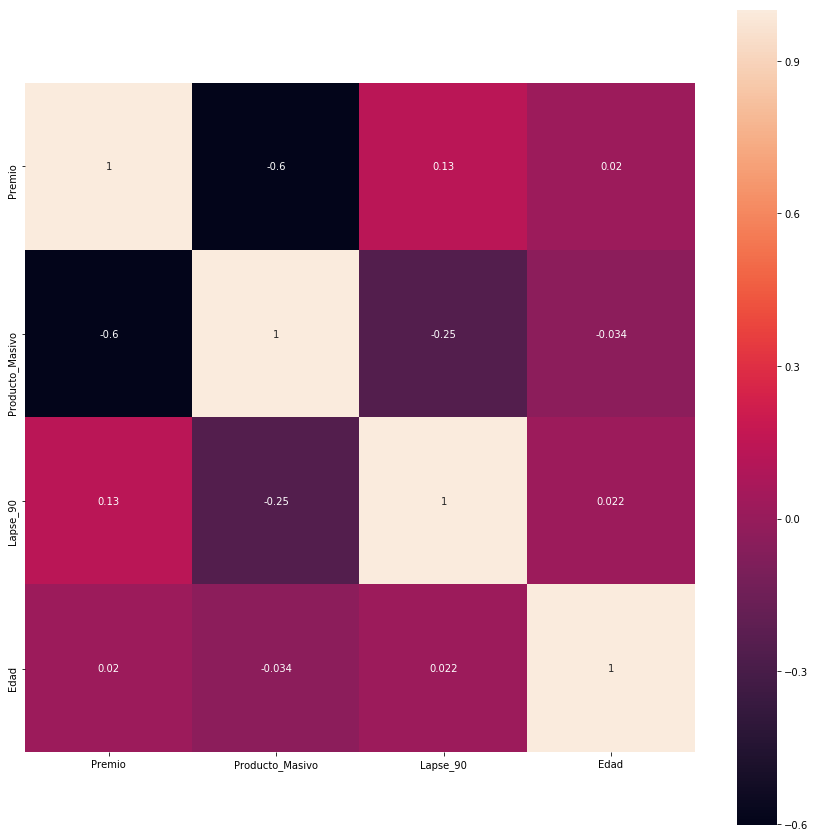

In [23]:
#Graficamos la matriz de correlacion
fig, ax = plt.subplots(figsize=(15,15))       
sns.heatmap(df.corr() , square=True, annot=True, ax=ax);

Notamos una fuerte correlacion negativa entre Premio y Producto Masivo. Esto es logico, ya que estos ultimos suelen tener premios muy bajos.

# Generamos un archivo con la base limpia lista para el modelado

In [25]:
df.to_csv('C:/Users/Ramiro/Desktop/Digital House/Desafios/Proyecto Integrador/Churn Naranja Limpio.csv')